In [1]:
%matplotlib inline
from n_monomers_model import *
from n_monomers_class import NMonomersSol
from pysb.simulator import ScipyOdeSimulator
import numpy as np
import matplotlib.pyplot as plt
import sympy

model = generate_n_monomers_model(3)
mon3 = NMonomersSol(model)

update_initial_conditions(model, {0: 1e-6, 1: 1.57e-7, 2: 1e-6})
update_kinetic_parameters(model, {0: 1e-2, 1: 2e6, 2: 2.74e6, 3: 2e-4, 4: 2.1e7})

In [2]:
mon3.model.species

[b_1(s1=None, s2=None),
 b_2(s1=None, s2=None),
 b_3(s1=None),
 b_1(s1=None, s2=1) % b_1(s1=None, s2=1),
 b_1(s1=1, s2=None) % b_2(s1=None, s2=1),
 b_2(s1=1, s2=None) % b_3(s1=1),
 b_1(s1=1, s2=2) % b_1(s1=None, s2=2) % b_2(s1=None, s2=1),
 b_1(s1=1, s2=2) % b_1(s1=3, s2=2) % b_2(s1=None, s2=1) % b_2(s1=None, s2=3),
 b_1(s1=1, s2=None) % b_2(s1=2, s2=1) % b_3(s1=2),
 b_1(s1=1, s2=2) % b_1(s1=None, s2=2) % b_2(s1=3, s2=1) % b_3(s1=3),
 b_1(s1=1, s2=2) % b_1(s1=3, s2=2) % b_2(s1=4, s2=3) % b_2(s1=None, s2=1) % b_3(s1=4),
 b_1(s1=1, s2=2) % b_1(s1=3, s2=2) % b_2(s1=4, s2=1) % b_2(s1=5, s2=3) % b_3(s1=4) % b_3(s1=5)]

In [12]:
for i, j in enumerate(mon3.model.odes): print ('equation:{}'.format(i), j)

equation:0 __s4*l2 + __s6*l1 + __s8*l2 + __s9*l1 + (0.5*__s0**2*k1)*(-2) + (__s3*l1)*2 + (__s0*__s1*k2)*(-1) + (__s0*__s4*k1)*(-1) + (__s0*__s5*k2)*(-1) + (__s0*__s8*k1)*(-1)
equation:1 __s10*l2 + __s4*l2 + __s6*l2 + 2.0*__s7*l2 + (__s0*__s1*k2)*(-1) + (__s1*__s2*k3)*(-1) + (2.0*__s1*__s3*k2)*(-1) + (__s1*__s6*k2)*(-1) + (__s1*__s9*k2)*(-1)
equation:2 (__s1*__s2*k3)*(-1) + (__s10*__s2*k3)*(-1) + (__s2*__s4*k3)*(-1) + (__s2*__s6*k3)*(-1) + (2.0*__s2*__s7*k3)*(-1)
equation:3 0.5*__s0**2*k1 + __s6*l2 + __s9*l2 + (__s3*l1)*(-1) + (2.0*__s1*__s3*k2)*(-1) + (2.0*__s3*__s5*k2)*(-1)
equation:4 __s0*__s1*k2 + __s10*l1 + __s6*l1 + (__s4*l2)*(-1) + (0.5*__s4**2*k1)*(-2) + (__s7*l1)*2 + (__s0*__s4*k1)*(-1) + (__s2*__s4*k3)*(-1) + (__s4*__s8*k1)*(-1)
equation:5 __s1*__s2*k3 + __s10*l2 + 2.0*__s11*l2 + __s8*l2 + __s9*l2 + (__s0*__s5*k2)*(-1) + (2.0*__s3*__s5*k2)*(-1) + (__s5*__s6*k2)*(-1) + (__s5*__s9*k2)*(-1)
equation:6 __s0*__s4*k1 + 2.0*__s1*__s3*k2 + __s10*l2 + 2.0*__s7*l2 + (__s6*l1)*(-1) + (__

In [4]:
mon3.reaction_groups

,1,2,3
1,"b_1(s1=None, s2=None)","b_2(s1=None, s2=None)",b_3(s1=None)
2,"b_1(s1=None, s2=1) % b_1(s1=None, s2=1)","b_1(s1=1, s2=None) % b_2(s1=None, s2=1)","b_2(s1=1, s2=None) % b_3(s1=1)"
3,NaN,"b_1(s1=1, s2=2) % b_1(s1=None, s2=2) % b_2(s1=...","b_1(s1=1, s2=None) % b_2(s1=2, s2=1) % b_3(s1=2)"
4,NaN,"b_1(s1=1, s2=2) % b_1(s1=3, s2=2) % b_2(s1=Non...","b_1(s1=1, s2=2) % b_1(s1=None, s2=2) % b_2(s1=..."
5,NaN,NaN,"b_1(s1=1, s2=2) % b_1(s1=3, s2=2) % b_2(s1=4, ..."
6,NaN,NaN,"b_1(s1=1, s2=2) % b_1(s1=3, s2=2) % b_2(s1=4, ..."


2019-01-07 11:30:40.735 - pysb.simulator.scipyode - WARNING - [n_monomers_model] This system of ODEs will be evaluated in pure Python. This may be slow for large models. We recommend installing a package for compiling the ODEs to C code: 'weave' (recommended for Python 2) or 'cython' (recommended for Python 3). This warning can be suppressed by specifying compiler='python'.


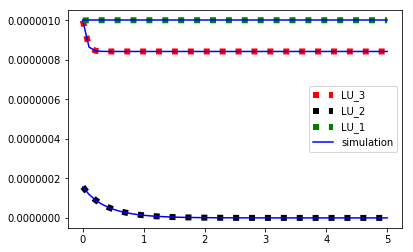

In [5]:
from n_monomers_model import *
from n_monomers_class import NMonomersSol
from pysb.simulator import ScipyOdeSimulator
import numpy as np
import matplotlib
import sympy

model = generate_n_monomers_model(3)
mon3 = NMonomersSol(model)

update_initial_conditions(model, {0: 1e-6, 1: 1.57e-7, 2: 1e-6})
update_kinetic_parameters(model, {0: 1e-2, 1: 2e6, 2: 2.74e6, 3: 2e-4, 4: 2.1e7})

tspan = np.linspace(0, 5, 50)
y = ScipyOdeSimulator(model, tspan).run().all
t = sympy.Symbol('t')

plt.figure(1)
exp3 = mon3.get_lu_m_sol(3)[0][0]
f3 = sympy.lambdify(t, exp3, 'numpy')
plt.plot(tspan, f3(tspan), color='r', linestyle=':', linewidth=6, label='LU_3')
plt.plot(tspan, y['__s2'], color='b')

exp2 = mon3.get_lu_m_sol(2)[0][0]
f2 = sympy.lambdify(t, exp2, 'numpy')
plt.plot(tspan, f2(tspan), color='k', linestyle=':', linewidth=6, label='LU_2')
plt.plot(tspan, y['__s1'] + y['__s5'], color='b')

exp1 = mon3.get_lu_m_sol(1)[0][0]
f1 = sympy.lambdify(t, exp1, 'numpy')
plt.plot(tspan, f1(tspan), color='g', linestyle=':', linewidth=6, label='LU_1')
plt.plot(tspan, y['__s0'] + y['__s4'] + y['__s8'], color='b', label='simulation')
plt.legend()
plt.show()
# plt.savefig('/Users/dionisio/Desktop/monomer.png', bbox_inches='tight', dpi=400)